In [20]:
%matplotlib inline
import pandas as pd
import geopandas as gp
import numpy as np
import os

from shapely.geometry import Point
from geopandas.tools import sjoin

PARQA = os.getenv('PARQA')

In [21]:
def toGeoDataFrame(df, lat='lat',lon='lon'):
    '''dataframe to geodataframe'''
    df[lat].replace(0, np.nan)
    df[lon].replace(0, np.nan)
    df = df[pd.notnull(df[lat])]

    df['geometry'] = df.apply(lambda z: Point(z[lon], z[lat]), axis=1)
    df = gp.GeoDataFrame(df)
    df.crs = {'init': 'epsg:4326', 'no_defs': True}
    return df

In [22]:
df = pd.read_csv(PARQA + 'data/DPR_property/playgrounds.csv', index_col=0, encoding='utf-8').rename(columns={'Name':'NAME'})

/Users/casy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


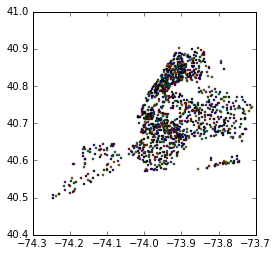

In [23]:
df = toGeoDataFrame(df)
df.plot()

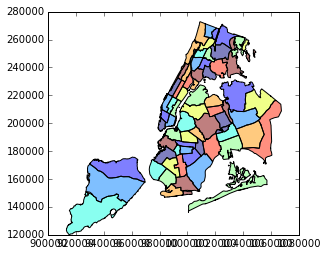

In [24]:
pDistricts = gp.read_file(PARQA + 'data/SHP/Park_Districts/ParkDistrict.shp')
pD = pDistricts[['SYSTEM','geometry']]
pD.plot()

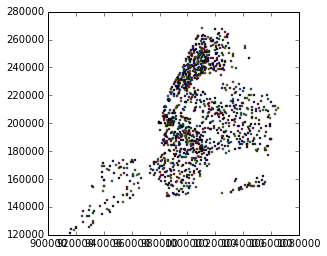

In [25]:
df = df.to_crs(pDistricts.crs)
df.plot()

In [26]:
dfD = sjoin(df, pD, how="left").rename(columns={'SYSTEM':'parkDistrict'}).to_crs(epsg=4326)

In [27]:
def writeGeoJson(gdf,path):
    '''writes df as json'''
    with open(path,'w') as jsFile:
        jsFile.write(gdf.to_json())

In [28]:
writeGeoJson(dfD, PARQA +'data/DPR_property/csv_ll_pD/playground_pd_ll.geojson')